In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import os 
import csv
import sys

In [ ]:
#load training and test data
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Updated Project/main-project/train/train_set.json') as json_file:
    data_train = json.load(json_file)
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Updated Project/main-project/train/test_set.json') as json_file:
    data_test = json.load(json_file)

Define input and output data from train and test set

In [ ]:
#store input and output data
raw_x_data_train=data_train[0]
y_data_train=data_train[1]

raw_x_data_test=data_test[0]
y_data_test=data_test[1]

In [ ]:
print(raw_x_data_train)

[[97.41663102366043, 54.405882034941776, 18.439088914585774, 0.0, 20.8806130178211, 53.9351462406472, 92.59049627256569, 89.02246907382428, 86.1278120005379, 86.00581375697809, 87.32124598286491, 91.2633551870629, 68.96375859826666, 18.110770276274835, 0.0, 21.0, 68.24954212300622, 25.80697580112788, 17.029386365926403, 24.839484696748443, 97.41663102366043, 55.362442142665635, 19.235384061671343, 0.0, 21.587033144922902, 53.9351462406472, 93.05912099305473, 89.20201791439474, 86.1278120005379, 86.0, 87.80091115700337, 91.83681179135085, 70.60453243241541, 19.026297590440446, 0.0, 21.02379604162864, 68.24954212300622, 25.238858928247925, 16.0, 25.0, 95.4148835350125, 54.70831746635972, 19.235384061671343, 0.0, 20.615528128088304, 53.36665625650534, 92.28217596047462, 89.40357934669059, 88.05679985100527, 87.0, 88.76936408468859, 92.0869154657707, 68.30812543175226, 20.09975124224178, 0.0, 20.0, 67.68308503607086, 27.018512172212592, 18.0, 26.90724809414742, 98.73702446397704, 54.708317

In [ ]:
print(y_data_train)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 

In [ ]:
#size of inputs(number of videos) train and test set
size_train=len(raw_x_data_train)
size_test=len(raw_x_data_test)
print(size_train)
print(size_test)

120
30


In [ ]:
#find maximum length of array in train and test set
rows = [] 
frames=[] 
# reading csv file 
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Updated Project/main-project/data/data_file.csv',"r",encoding="utf8") as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row)
        frames.append(row[3])
#convert character list to integer list
frames = [int(i) for i in frames]    
maxSize=int(max(frames))
print(maxSize)
maxSize=maxSize*20
print(maxSize)

16
320


In [ ]:
#define the size for train and test array with padding
r1, c1 = (size_train, maxSize)
r2,c2 = (size_test, maxSize)
print(r1,c1)
print(r2,c2)
x_data_train= [[0 for i in range(c1)] for j in range(r1)]
x_data_test= [[0 for i in range(c2)] for j in range(r2)]

120 320
30 320


In [ ]:
print(frames)

[8, 6, 5, 6, 9, 6, 8, 7, 5, 6, 7, 7, 11, 7, 6, 7, 7, 8, 6, 6, 6, 6, 8, 7, 8, 7, 7, 9, 8, 8, 8, 7, 7, 7, 7, 7, 12, 10, 9, 8, 10, 9, 9, 8, 11, 7, 11, 9, 5, 4, 4, 4, 5, 5, 6, 4, 4, 6, 5, 5, 14, 10, 10, 12, 9, 11, 12, 10, 11, 11, 11, 10, 8, 6, 7, 11, 11, 11, 8, 9, 13, 13, 13, 9, 11, 12, 10, 15, 13, 13, 13, 12, 14, 13, 13, 10, 6, 7, 6, 6, 6, 6, 8, 5, 6, 8, 6, 5, 6, 7, 8, 7, 7, 9, 8, 6, 9, 9, 8, 11, 8, 7, 6, 5, 5, 8, 7, 7, 7, 8, 9, 7, 5, 7, 8, 10, 9, 9, 8, 14, 9, 11, 13, 16, 6, 6, 6, 8, 7, 11]


In [ ]:
for i in range(size_train):
    frames20=int(frames[i])*20
    print(frames20)

160
120
100
120
180
120
160
140
100
120
140
140
220
140
120
140
140
160
120
120
120
120
160
140
160
140
140
180
160
160
160
140
140
140
140
140
240
200
180
160
200
180
180
160
220
140
220
180
100
80
80
80
100
100
120
80
80
120
100
100
280
200
200
240
180
220
240
200
220
220
220
200
160
120
140
220
220
220
160
180
260
260
260
180
220
240
200
300
260
260
260
240
280
260
260
200
120
140
120
120
120
120
160
100
120
160
120
100
120
140
160
140
140
180
160
120
180
180
160
220


In [ ]:
for i in range(size_test):
    frames20=int(frames[i+size_train])*20
    #print(frames20)
print(frames20)

220


In [ ]:
#create arrays with padding
from sklearn import preprocessing
for i in range(size_train):
   frames20=int(frames[i])*20
   for j in range(frames20):
        x_data_train[i][j]=raw_x_data_train[i][j]
x_data_train = preprocessing.normalize(x_data_train)
for i in range(size_test):
   frames20=int(frames[i+size_train])*20
   for j in range(frames20):
        x_data_test[i][j]=raw_x_data_test[i][j]
x_data_test = preprocessing.normalize(x_data_test)

Only for LSTM

In [ ]:
x1=[]
y1=[]
x11=[]
y11=[]

x2=[]
y2=[]
x22=[]
y22=[]
for i in range(len(x_data_train)):
  x1.append(x_data_train[i])
  x11.append(x1)
  x1=[]

for i in range(len(y_data_train)):
  y1.append(y_data_train[i])
  y11.append(y1)
  y1=[]

for i in range(len(x_data_test)):
  x2.append(x_data_test[i])
  x22.append(x2)
  x2=[]

for i in range(len(y_data_test)):
  y2.append(y_data_test[i])
  y22.append(y2)
  y2=[]
  
x_data_train=np.array(x11)
y_data_train=np.array(y11)
x_data_test=np.array(x22)
y_data_test=np.array(y22)
print(y_data_train)


[[[1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 0 1]]]


In [ ]:
#import libraries for training
from keras import models
from keras import layers
from keras.optimizers import RMSprop, SGD

Create model and train the dataset using LSTM (change)

In [ ]:
network2=models.Sequential()
network2.add(layers.LSTM(256, return_sequences=True,input_shape=(1,320),dropout=0.05))
network2.add(layers.Dense(128, activation='sigmoid'))
network2.add(layers.Dense(10, activation='softmax'))
opt = SGD(lr=0.05)
network2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
network2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 256)            590848    
_________________________________________________________________
dense_16 (Dense)             (None, 1, 128)            32896     
_________________________________________________________________
dense_17 (Dense)             (None, 1, 10)             1290      
Total params: 625,034
Trainable params: 625,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = network2.fit(x_data_train, y_data_train, epochs=750, batch_size=4, validation_data=(x_data_test, y_data_test))

Epoch 1/750
30/30 [==============================] - 1s 17ms/step - loss: 2.4553 - accuracy: 0.0500 - val_loss: 2.3249 - val_accuracy: 0.1000
Epoch 2/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4323 - accuracy: 0.0667 - val_loss: 2.3810 - val_accuracy: 0.1000
Epoch 3/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4622 - accuracy: 0.0667 - val_loss: 2.3909 - val_accuracy: 0.1000
Epoch 4/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4235 - accuracy: 0.1083 - val_loss: 2.3941 - val_accuracy: 0.1000
Epoch 5/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4463 - accuracy: 0.0750 - val_loss: 2.4188 - val_accuracy: 0.1000
Epoch 6/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4388 - accuracy: 0.0500 - val_loss: 2.3362 - val_accuracy: 0.1000
Epoch 7/750
30/30 [==============================] - 0s 4ms/step - loss: 2.4315 - accuracy: 0.0750 - val_loss: 2.3400 - val_accuracy: 0.1000
Epoch 8/750


Visualization for LSTM

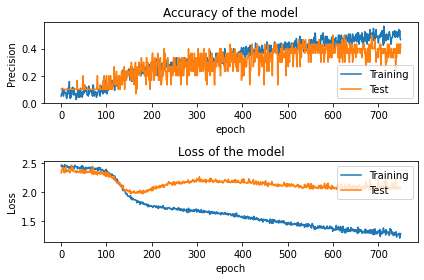

In [ ]:
# Visualize
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
#test accuracy
test_loss, test_acc = network2.evaluate(x_data_test, y_data_test)
print('test_acc:', test_acc)

1/1 [==============================] - 0s 1ms/step - loss: 2.0495 - accuracy: 0.4333
test_acc: 0.4333333373069763


Store the model in json format for LSTM

In [ ]:
from keras.models import model_from_json
model_json = network2.to_json()
with open("/content/drive/My Drive/Colab Notebooks/Our Projects/Updated Project/main-project/train/network_LSTM_class.json", "w") as json_file:
    json_file.write(model_json)

Store the weight value for LSTM

In [ ]:
network2.save_weights("/content/drive/My Drive/Colab Notebooks/Our Projects/Updated Project/main-project/train/network_LSTM_weights_class.h5")
print("Done")

Done


Prediction for LSTM

In [ ]:
from keras.models import model_from_json

json_file = open("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_clase.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_weights_clase.h5")
print("Done")

Done
